In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'Profit in 10000s')

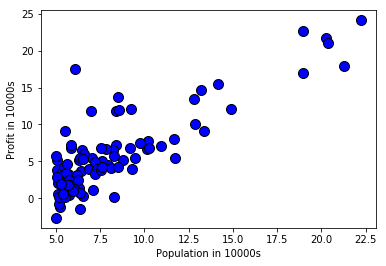

In [33]:
df = pd.read_csv('Data/ex1data1.txt', sep = ',',names = ['Population in 10000s','Profit in 10000s'])

X, y = df.iloc[:,0], df.iloc[:,1]
X = np.stack([np.ones(len(y)), X], axis = 1)

plt.plot(X[:,1], y, 'bo', ms = 10, mec = 'k')
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000s')

In [34]:
def computeCost(X, y, theta):
    J = 0
    theta0 = theta[0]
    theta1 = theta[1]
    m = len(y)
    for i in range(m):
        J += ((theta0 + theta1 * X[i, 1]) - y[i]) ** 2
        
    J = J/(2* m)
    
    return J

In [24]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    theta = theta.copy()
    
    J_history = []
    
    m = len(y)
    for i in range(num_iters):
        j = 0
        for i in range(m):
            j += ((theta[0] + theta[1] * X[i, 1]) - y[i])

        j = j / m
        temp0 = theta[0] - alpha * j
        j = 0
        for i in range(m):
            j += (((theta[0] + theta[1]*X[i, 1]) - y[i]) * X[i, 1])
        j = j/m
        
        temp1 = theta[1] - alpha * j
        theta[0] = temp0
        theta[1] = temp1
        
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [29]:
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta Found by Gradient Descent {:.4f}, {:.4f}'.format(*theta))

Theta Found by Gradient Descent -3.6303, 1.1664


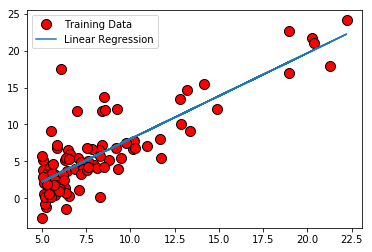

In [48]:
#Plot Linear Fit
plt.plot(X[:, 1], y , 'ro', ms = 10, mec = 'k')
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training Data', 'Linear Regression'])

In [49]:
#predicting profit for different population
predict1 = np.dot([1, 3.5], theta)                 #Population = 35000
print(predict1 * 10000)

predict2 = np.dot([1, 7], theta)                   #Population = 70000
print(predict2 * 10000)

4519.7678677017675
45342.45012944714
